In [8]:
import pandas as pd
import collections
from math import radians, sin, cos, asin, sqrt
import warnings
import matplotlib.pyplot as plt
import numpy as np
warnings.filterwarnings('ignore')
from statistics import stdev,mean


# Part A: Building a Prediction model that will predict Taxi Wait time

In [83]:
%run src/get_flight

In [102]:
%run src/plot.py

In [16]:
path = 'U://Programming for Data Science (ECE143 22fall)//Final Project//flight.csv'
df,dic = get_flight(path)
df

,DATE / STATUS,FLIGHT,FROM,SCHEDULED ARRIVAL,DEPARTED,ARRIVED,DURATION
0,"Sat, 31. Mar 2018",RU619 ABW619,Flag for Russia Moscow (SVO / UUEE),00:00 CST,10:27 MSK,22:59 CST,7h 32m
1,"Sat, 31. Mar 2018",JT2751 LNI2751,Flag for Indonesia Manado (MDC / WAMM),00:05 CST,19:03 WITA,00:03 CST,5h
2,"Sat, 31. Mar 2018",HO1180 DKH1180,Flag for China Harbin (HRB / ZYHB),00:05 CST,21:11 CST,23:53 CST,2h 42m
3,"Sat, 31. Mar 2018",FM9394 CSH9394,Flag for China Dongsheng (DSN / ZBDS),00:05 CST,21:31 CST,23:44 CST,2h 13m
4,"Sat, 31. Mar 2018",MM79 APJ079,Flag for Japan Osaka (KIX / RJBB),00:05 CST,22:41 JST,23:49 CST,2h 8m
...,...,...,...,...,...,...,...
696,"Sun, 01. Apr 2018",KA870 HDA870,Flag for Hong Kong Hong Kong (HKG / VHHH),23:45 CST,22:15 HKT,00:13 CST,1h 58m
697,"Sun, 01. Apr 2018",9C8796 CQH8796,Flag for China Lanzhou (LHW / ZLLL),23:45 CST,20:57 CST,23:23 CST,2h 26m
698,"Sun, 01. Apr 2018",HO1222 DKH1222,Flag for China Sanya (SYX / ZJSY),23:55 CST,20:31 CST,23:31 CST,2h 59m
699,"Sun, 01. Apr 2018",9C8580 CQH8580,Flag for Thailand Bangkok (BKK / VTBS),23:55 CST,19:47 UTC+07,00:38 CST,3h 51m


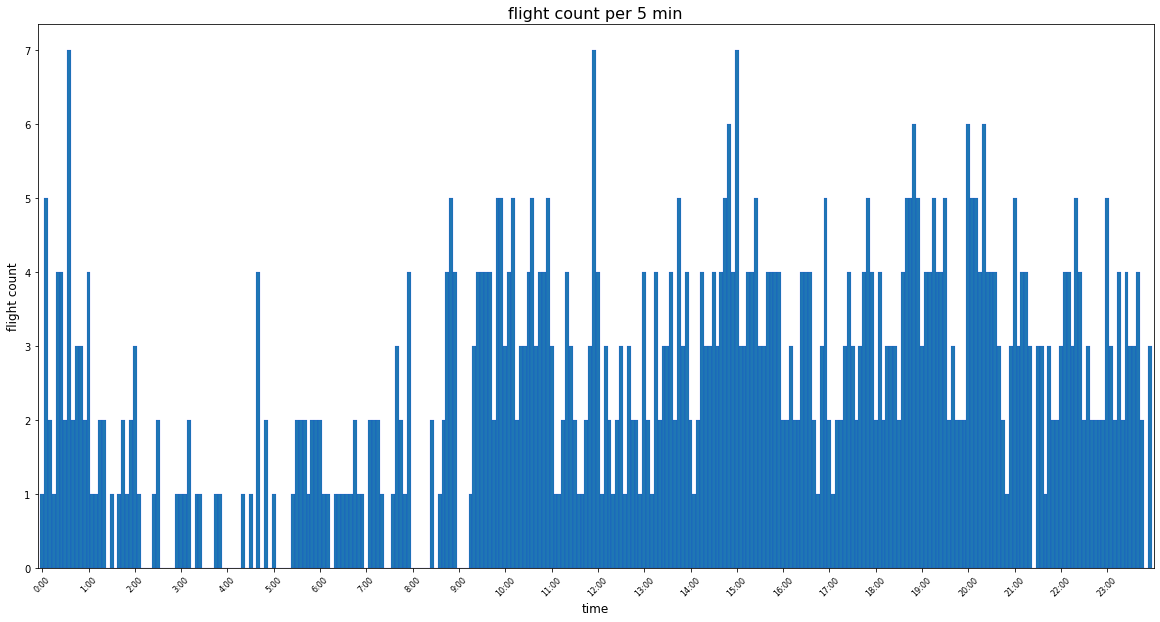

In [104]:
plot(dic,"flight count per 5 min","time","flight count")

In [17]:
%run src/get_all_taxis_data.py

In [18]:
path = 'U://Programming for Data Science (ECE143 22fall)//Final Project//01//'
df3,index_list = get_all_taxis_data(path)
df3

,0,1,2,3
12708,0,0,2,9
14915,0,0,0,43
14520,0,0,1,12
18785,19,24,21,47
27981,18,19,20,44
...,...,...,...,...
14931,20,18,23,58
16881,20,23,20,31
20650,21,27,21,40
22063,21,31,21,40


In [19]:
%run src/get_waittimeAvg.py

In [20]:
waitave = get_waittimeAvg(df3)

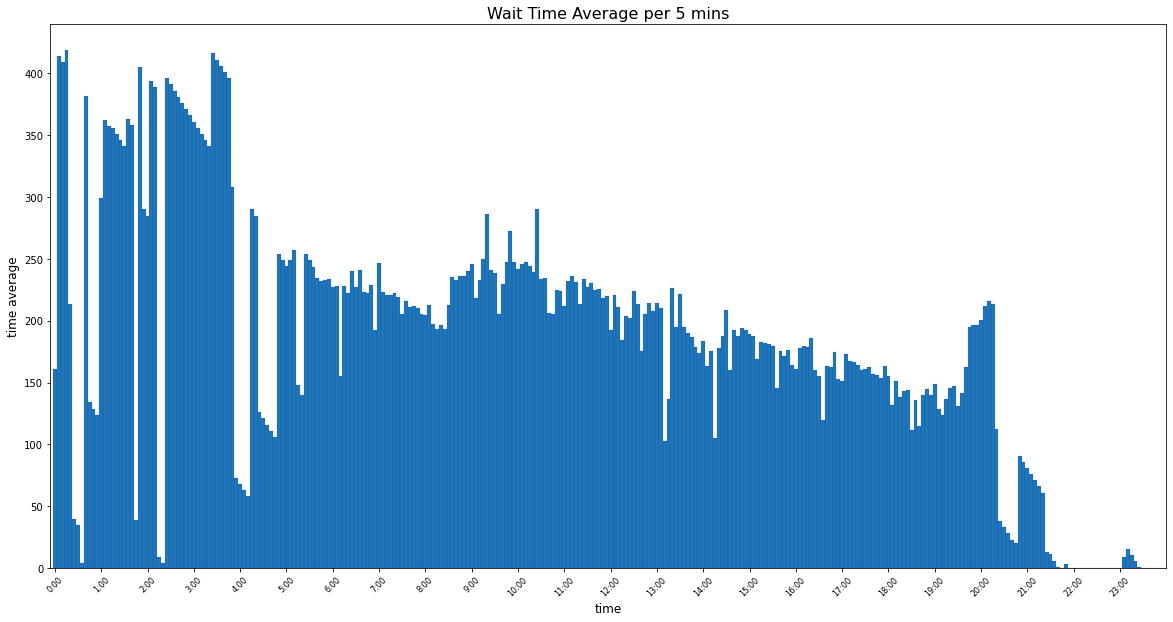

In [73]:
plot(waitave, "Wait Time Average per 5 mins","time","time average")

In [122]:
%run src/get_CarInLotPerSlots


<div>
    <img src = "./satellite_photo.png" width="400" height="400">
</div>


<div>
    <img src = "./google_map.png" width="400" height="400">
</div>

In [ ]:
Path = 'U://Programming for Data Science (ECE143 22fall)//Final Project//01//'
carNumTable1 = get_CarInLotPerSlots(Path,index_list)
carNumTable1

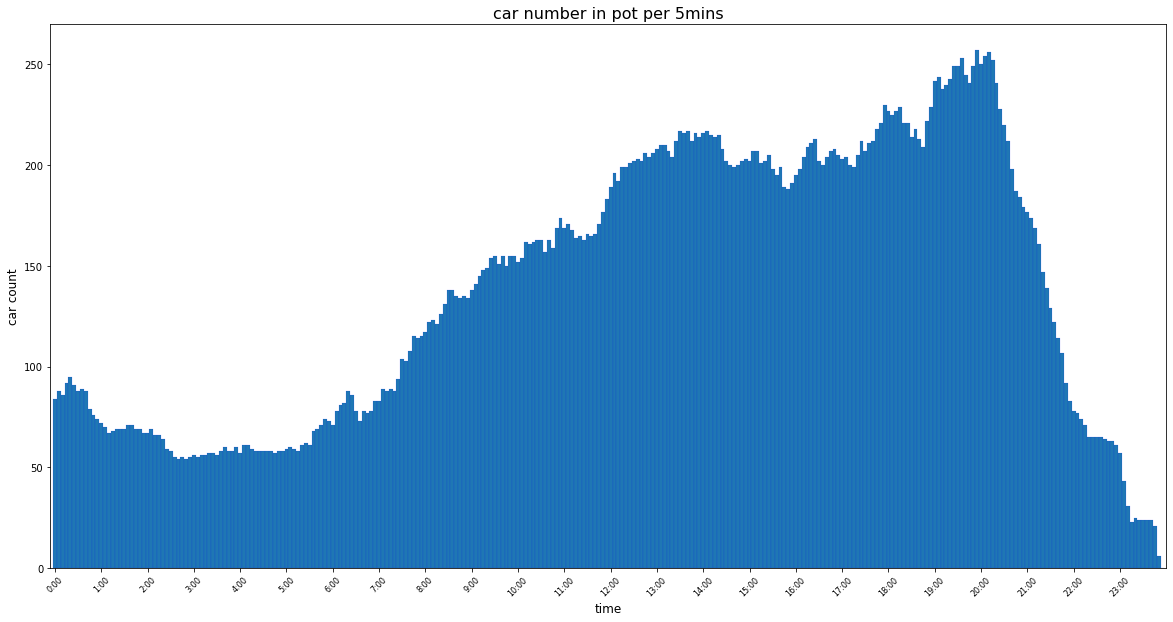

In [103]:
plot(carNumTable1, "car number in pot per 5mins", "time", "car count")

In [25]:
%run src/get_XY.py

In [26]:
X,y = get_XY(df3,carNumTable1,dic,waitave)

In [31]:
%run src/get_set.py
%run src/try_different_method.py
%run src/get_models.py
%run src/runModels.py

### Run Machine Learning Models

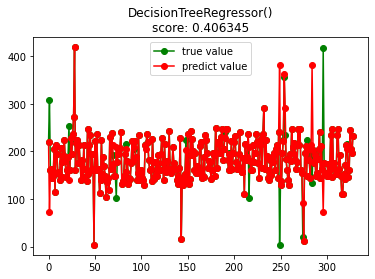

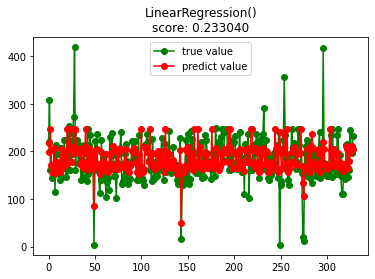

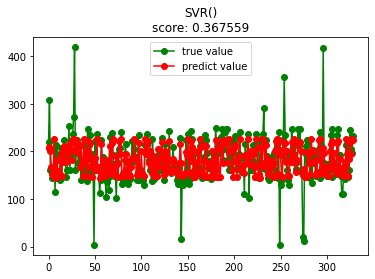

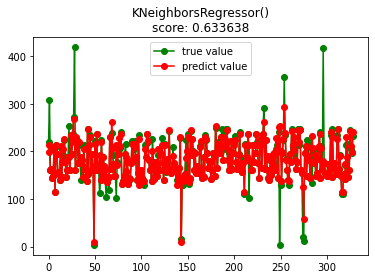

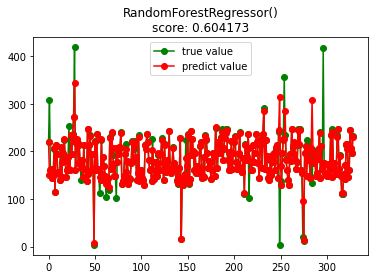

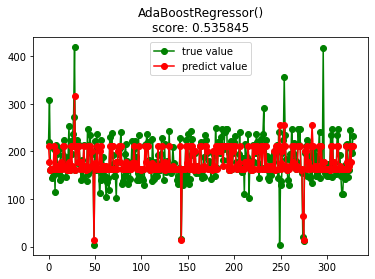

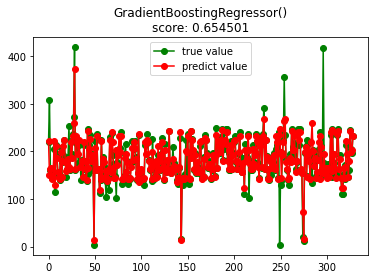

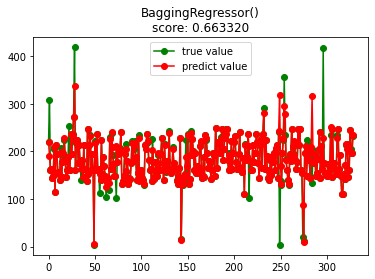

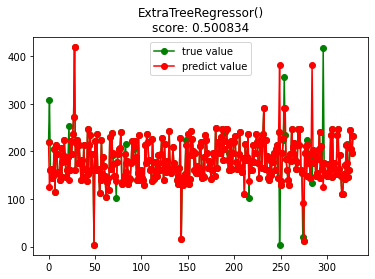

In [51]:
scores_before = runModel(X,y)

In [33]:
%run src/Process_outliers.py

### Run Machine Learning Models on Processed X, Y

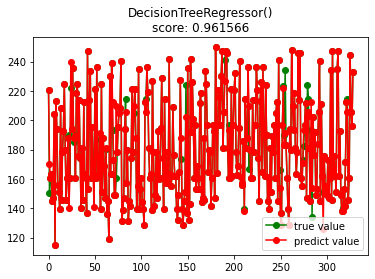

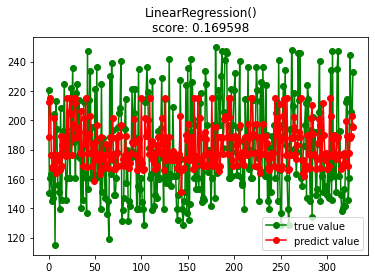

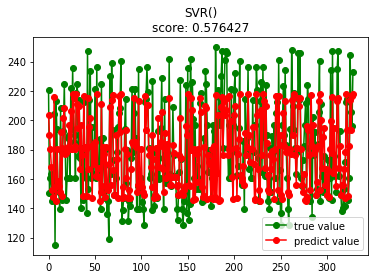

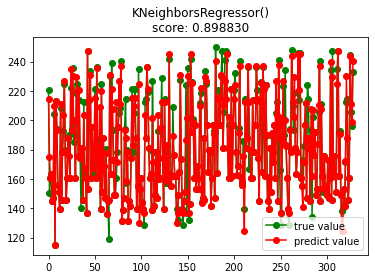

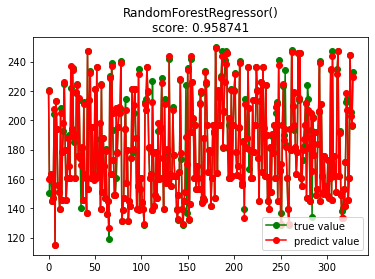

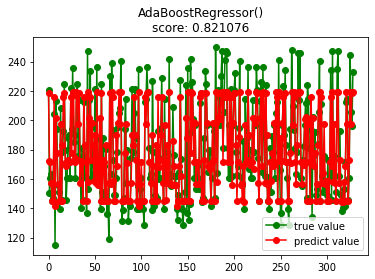

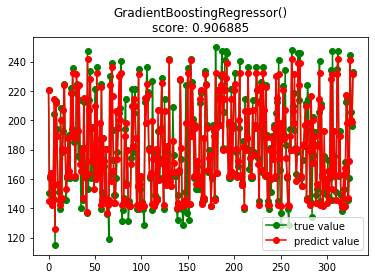

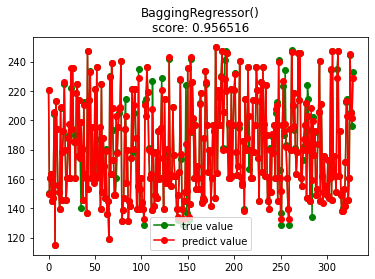

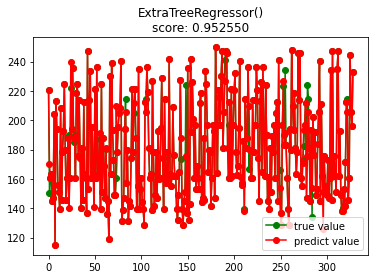

In [118]:
X_process,y_process = Process_outliers(X,y)
scores_after = runModel(X_process,y_process)

## Using K-Fold Method on Processed Data

In [35]:
%run src/evaluate_model.py
%run src/run_kFold.py

In [36]:
scores_kFold = run_kFold(X_process,y_process)

### Plot the result of all models in three training process

Text(0.5, 1.0, 'Comparison of model performances')

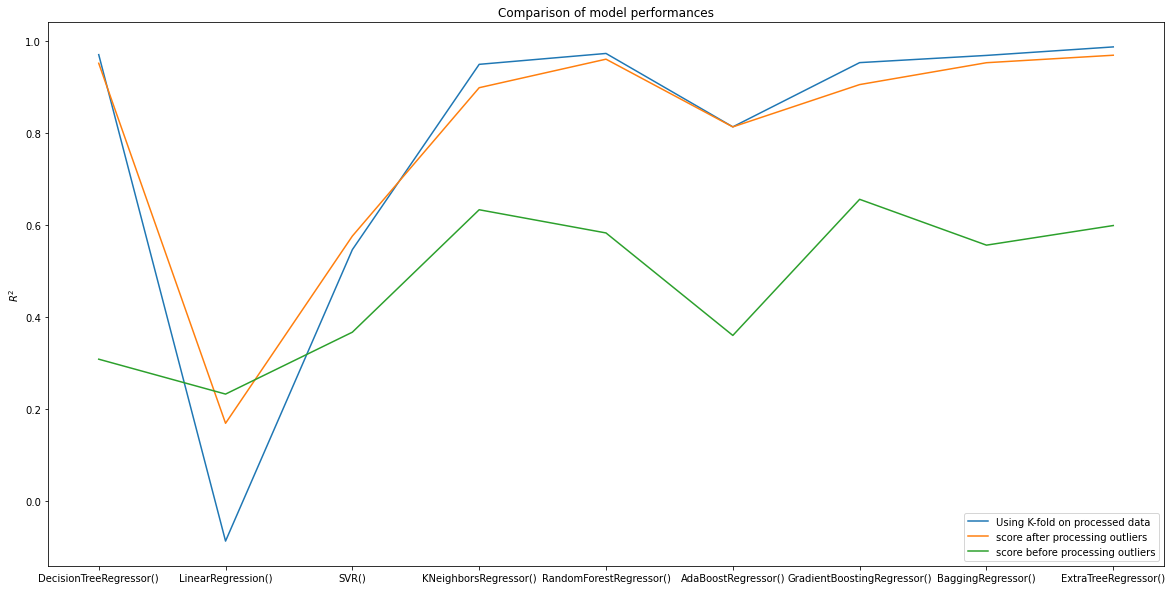

In [40]:
plt.figure(figsize = (20,10))
plt.plot(range(len(get_models.get_models())),scores_kFold)
plt.plot(range(len(get_models.get_models())),scores_after)
plt.plot(range(len(get_models.get_models())),scores_before)
plt.xticks(range(len(get_models.get_models())),get_models.get_models())
plt.ylabel(r'${R^2}$')
plt.legend(['Using K-fold on processed data','score after processing outliers','score before processing outliers'])
plt.title(("Comparison of model performances"))

In [43]:
models = get_models.get_models() #get all trained models

## Part B: Build a Estimation Model for Taxi Drivers:

Assuming Wait time in Taxi Car pool is $T_w $, and the average Transit time between Airport and Downtown area is $ T_r$. In this project, based on Map Search, we define the T_r = 60 min

We Define Operation Cost per minutes as $c$, average Loaded Rate per 5 min as $\lambda$, and the average Profit per hour in Entire Urban Area as $P_a $.

We are able to build an Expectation Model as following:

Expected Revenue from Waiting in the airport:
$P_w $ = $T_r$ * $P_a $ * $\lambda$ - $c$ * $T_r$

Expected Revenue from going back to Urban Area:
$P_d $ = $T_w$ * $P_a $ -$c$ * $T_w$ - $c$ * $T_r$

which we can simplify as the following:

Expected Revenue from Waiting in the airport:
$P_w $ = $T_r$ * $P_a $

Expected Revenue from going back to Urban Area:
$P_d $ = $T_w$ * $P_a $ * $\lambda$ -$c$ * $T_w$

Assuming the operating cost is 0.12 RMB per min(electric taxi vehicle)

In [120]:
%run src/get_runningPortions.py #get loaded-rate of taxi in downtown
%run src/get_averageRevenue.py #get average Revenue in Downtown Area
%run src/estimation_model.py #Contains all required function for estimation models
%run src/get_waitave_processed.py #get processed real wait time

In [45]:
path = 'U://Programming for Data Science (ECE143 22fall)//Final Project//01//'
running_portions = get_runningPortions(path)#get loaded-rate of taxi in downtown

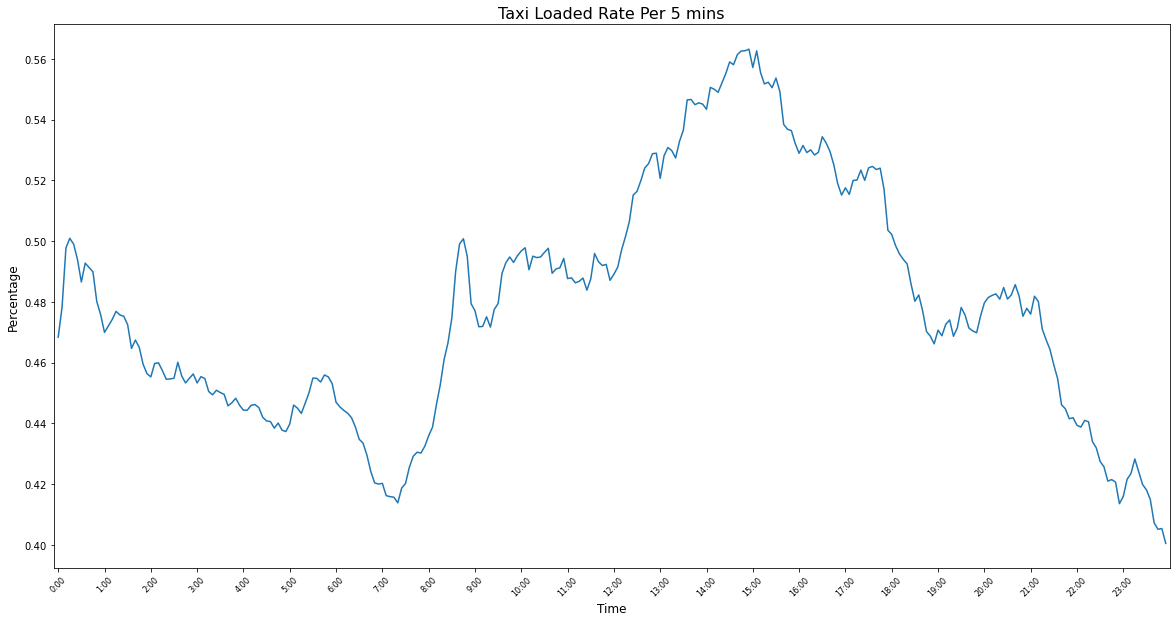

In [66]:
xlabel = []
for i in range(len(running_portions)):
        if i % 12 == 0:
            xlabel.append(i//12)
        else:
            xlabel.append("")
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(np.arange(0, 24, 1/12), running_portions)
ax.set_xlim(-0.1, 24)

ax.set_xticks(list(range(24)))
ax.set_xticklabels([f"{i}:00" for i in range(24)], rotation=45, fontsize=8)
ax.set_xlabel("Time", fontsize=12)
ax.set_ylabel("Percentage", fontsize=12)
ax.set_title("Taxi Loaded Rate Per 5 mins", fontsize=16)

plt.show()

In [46]:
path = 'U://Programming for Data Science (ECE143 22fall)//Final Project//01//'
ave_rev = get_averageRevenue(path)#get average Revenue in Downtown Area

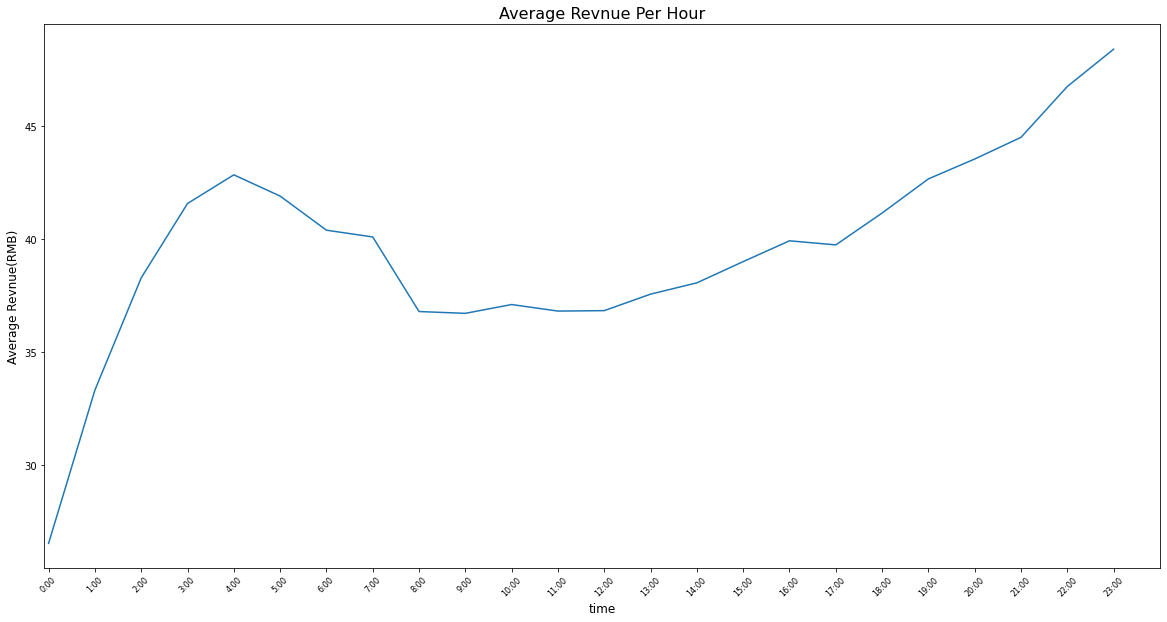

In [65]:
xlabel = []
for i in range(len(ave_rev)):
        if i % 12 == 0:
            xlabel.append(i//12)
        else:
            xlabel.append("")
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(np.arange(0, 24), ave_rev)
ax.set_xlim(-0.1, 24)
#ax.set_ylim(0, 210)
ax.set_xticks(list(range(24)))
ax.set_xticklabels([f"{i}:00" for i in range(24)], rotation=45, fontsize=8)
ax.set_xlabel("time", fontsize=12)
ax.set_ylabel("Average Revnue(RMB)", fontsize=12)
ax.set_title("Average Revnue Per Hour", fontsize=16)
# ax.plot(np.arange(0, len(y)/12, 1/12), y, color="orange")
# ax.fill_between(np.arange(0, len(y)/12, 1/12), 0, y, where=np.array(y) > 0)
plt.show()

In [47]:
waitave_process = get_waitave_processed(waitave)#get processed real wait time

### Ground Truth of our Estimation Model

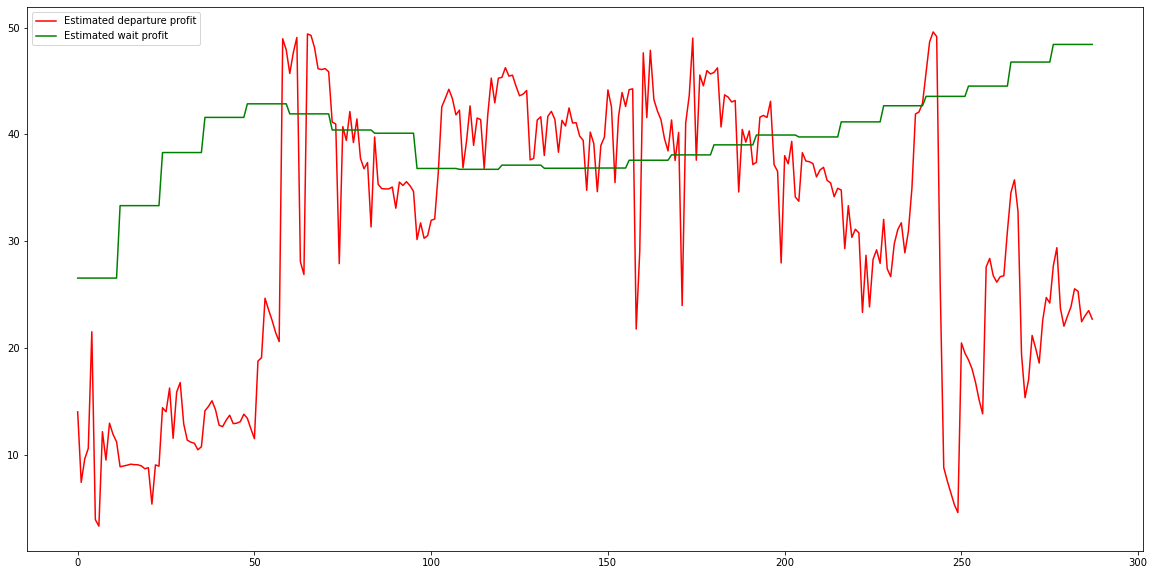

In [109]:
T_r = 60
plot_EstimateOnApr1st(T_r,ave_rev,running_portions,waitave_process)

### Estimation Model performance on Testing Dataset

150 150


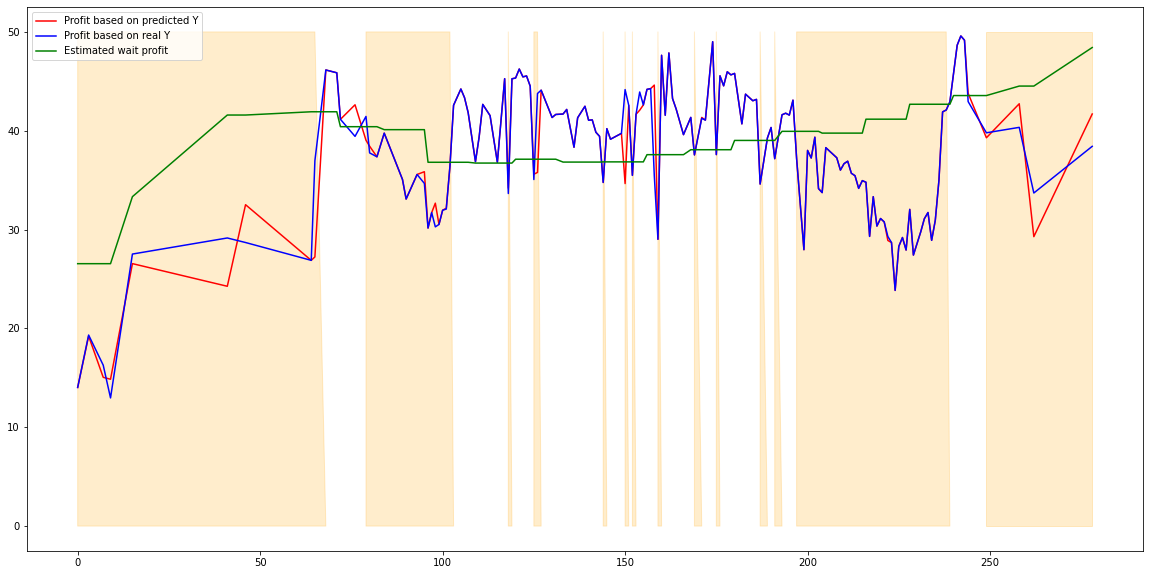

In [121]:
T_r = 60
get_EstimateOnTestSet(models[-1],X_process,y_process,ave_rev,running_portions,T_r)